Figures for Section 1.1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
# read dat file
def reaDat(filename):
    # read dat to a list of lists
    data = [i.strip().split() for i in open("../../data/"+filename).readlines()]
    data_df = pd.DataFrame(data)
    
    # change datatype from str to int
    data_df = data_df.astype({0:'int'})

    return data_df

In [4]:
# time series plot
def plotDat(ts, xlim):
    plt.plot(xlim,ts,'o-')
    plt.show()

Figure 1.1

 Wolfer’s sunspot numbers from 1700 to 1994.

In [5]:
sunspots = reaDat("spots.dat")

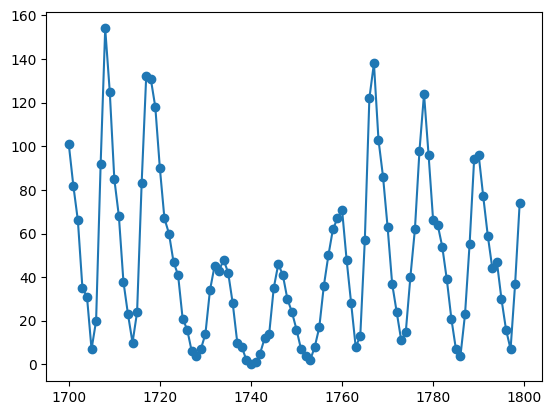

In [6]:
plotDat(sunspots,range(1700,1800))

Figure 1.2

Number of lynx trapped in the MacKenzie River district between 1821 and 1934.

In [7]:
lynx = reaDat("lynx.dat")
# fill in one column with log-values
lynx['log'] = np.log10(lynx[0])

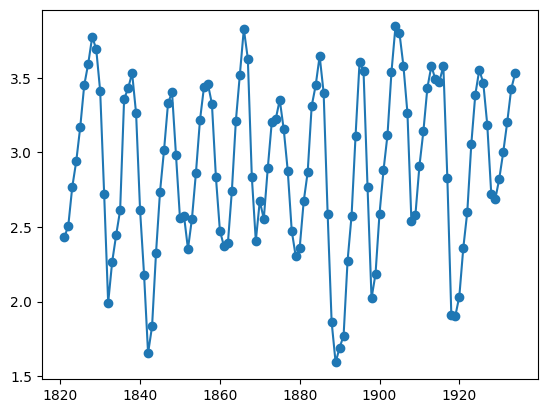

In [8]:
# set xticks
end = 1821+len(lynx)
plotDat(lynx['log'],range(1821,end))

Figure 1.3

Yields of Treasury bills from July 17, 1959, to December 31, 1999.

In [10]:
# read bills data
def readBills(filename):
    # read data
    data = [i.strip().split() for i in open("../../data/"+filename).readlines()]
    # check the valid data
    for k in range(50):
        len_sub_list = len(data[k])
        if len_sub_list == 2:
            # store the starting index
            s = k
            for j in range(50):
                if len(data[-j])==2:
                    break
            # slice the data
            # obtain the valid data
            if j!=1:
                d = data[s:1-j]
            else:
                d = data[s:]
            break
    # method1
    # use the date as index
    d_df = pd.DataFrame({x[0]:x[1:] for x in d}).T
    # change datatype from str to int
    d_df = d_df.astype({0:'float'})

    # method2
    # treat the date as one column
    dd = pd.DataFrame(d)
    dd = dd.astype({1:'float'})

    return dd[1]



In [11]:
bill03 = readBills("bills03.dat")
bill06 = readBills("bills06.dat")
bill12 = readBills("bills12.dat")

Text(0.5, 1.0, 'Yields of 12-month Treasury Bills')

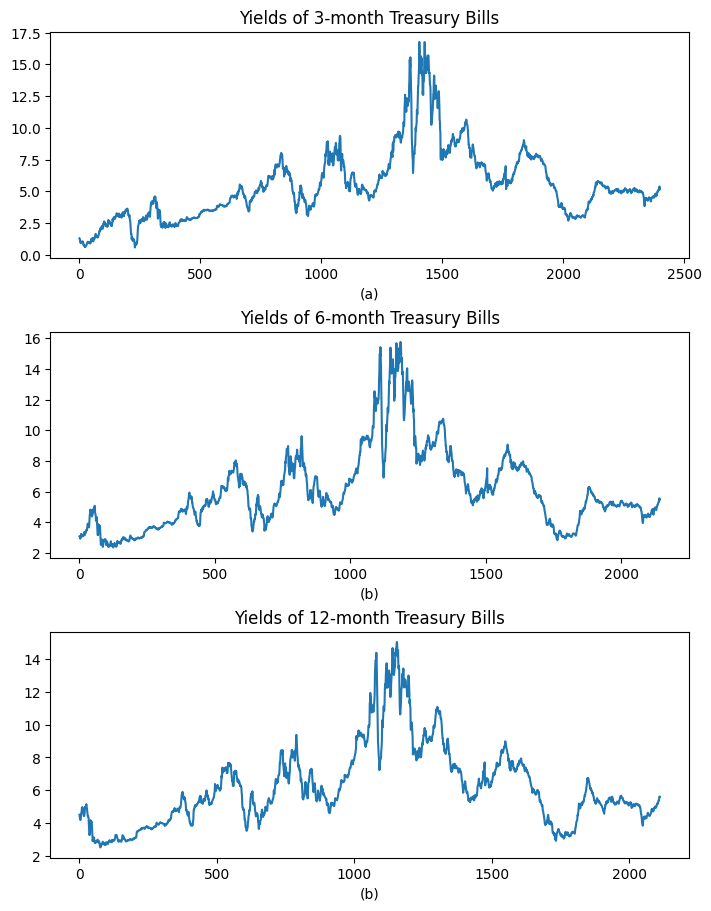

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(7,9),constrained_layout = True)
axs[0].plot(bill03)
axs[0].set_xlabel('(a)')
axs[0].set_title("Yields of 3-month Treasury Bills")
axs[1].plot(bill06)
axs[1].set_xlabel('(b)')
axs[1].set_title("Yields of 6-month Treasury Bills")
axs[2].plot(bill12)
axs[2].set_xlabel('(b)')
axs[2].set_title("Yields of 12-month Treasury Bills")



Figure 1.4 

S&P 500 from January 3, 1972, to December 31, 1999.

Text(0.5, 1.0, 'The Standard and Poor’s 500 Index')

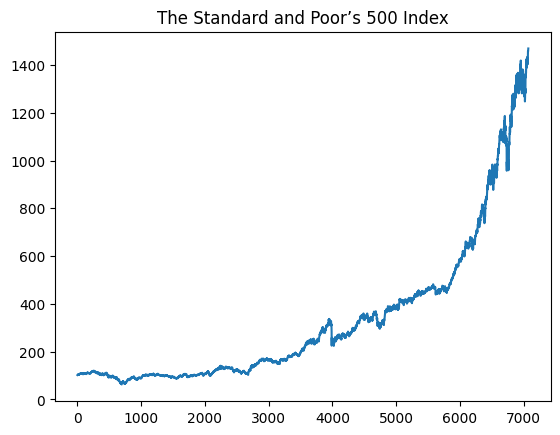

In [13]:
sp500 = [i.strip().split() for i in open("../../data/sp500.dat.rtf").readlines()]

# find VALID data
# the length of the valid strings in 
# an entry is smaller than 10
for k in range(50):
    len_sub_list = len(sp500[k])

    # the starting point of valid data
    if len_sub_list == 6: 
        # store the starting index
        s = k
        for j in range(1,50):
            if len(sp500[-j])==5:
                break
        # slice the data
        # obtain the valid data
        if j!=1:
            d = sp500[s:1-j]
        else:
            d = sp500[s:]
        break

        
# reverse rows
d_sp500 = pd.DataFrame(d[12:]).iloc[::-1]
# reverse index
d_sp500.index = d_sp500.index.values[::-1]
d_sp500.head()

# remove the last element "\" or "}"
d_sp500[4]=d_sp500[4].str[:-1]
d_sp500.head()

# change datatype from str to float
d_sp500 = d_sp500.astype({1:'float',2:'float',3:'float',4:'float'})
d_sp500.head()

fig,ax = plt.subplots()
ax.plot(d_sp500[4])
plt.title("The Standard and Poor’s 500 Index")